In [122]:
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from utils import open_csv_file, append_rows_dataframes, create_csv_file
from data import DataFrame
from correlation_matrix import Correlation


# importing required libraries
import pandas as pd

In [123]:
# reading the data and looking at the first five rows of the data
data_two =pd.read_csv("data.csv")
data = data_two.iloc[2:,1:17]

data.head()

,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
2,1.00,0,0.000,0.000000,0.000,0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.00,0,0.500,0.785714,0.125,0.833333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.00,0,1.000,0.071429,0.375,0.833333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.75,1,0.125,0.000000,0.500,0.500000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.00,1,0.125,0.357143,0.250,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [124]:

# statistics of the data
data.describe()

,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
count,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000
mean,0.512043,0.618812,0.349129,0.170928,0.228267,0.689261,0.457921,0.542079,0.402513,0.597487,0.237814,0.146992,0.615194
std,0.346975,0.485725,0.323142,0.228526,0.190124,0.234233,0.498274,0.498274,0.490451,0.490451,0.425785,0.354131,0.486596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.250000,0.071429,0.204292,0.833333,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.750000,1.000000,0.625000,0.214286,0.375000,0.833333,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
# defining the kmeans function with initialization as k-means++
# kmeans = KMeans(n_clusters=20, init='k-means++')

# # fitting the k means algorithm on scaled data
# kmeans.fit(data)

# inertia on the fitted data
# kmeans.inertia_

In [126]:
# from sklearn.metrics import silhouette_score
# # calculate silhouette_score and print it
# silhouette_avg = silhouette_score(data, kmeans.labels_)
# print("Silhouette Score: ", silhouette_avg)

In [127]:
data

,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
2,1.00,0,0.000,0.000000,0.000,0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.00,0,0.500,0.785714,0.125,0.833333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.00,0,1.000,0.071429,0.375,0.833333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.75,1,0.125,0.000000,0.500,0.500000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.00,1,0.125,0.357143,0.250,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,0.25,0,0.625,0.642857,0.375,0.833333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5250,0.25,1,0.125,0.071429,0.000,0.833333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5251,0.75,1,0.375,0.071429,0.125,0.833333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5252,0.75,1,0.500,0.071429,0.500,0.500000,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [128]:
data.drop([ 'Work_Experience', 'Var_1', 'Gender_Female', 'Gender_Male'], axis=1)

,Age,Graduated,Profession,Family_Size,Ever_Married_No,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,1.00,0,0.000,0.000,0.0,1.0,0.0,0.0,1.0
1,1.00,0,0.500,0.125,0.0,1.0,0.0,1.0,0.0
2,0.00,0,1.000,0.375,1.0,0.0,0.0,0.0,1.0
3,0.75,1,0.125,0.500,0.0,1.0,0.0,1.0,0.0
4,1.00,1,0.125,0.250,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5247,0.25,0,0.625,0.375,1.0,0.0,0.0,0.0,1.0
5248,0.25,1,0.125,0.000,1.0,0.0,0.0,0.0,1.0
5249,0.75,1,0.375,0.125,1.0,0.0,0.0,0.0,1.0
5250,0.75,1,0.500,0.500,0.0,1.0,0.0,1.0,0.0


In [129]:
create_csv_file(data, 'data_2.csv')

In [130]:
from sklearn.decomposition import PCA

# No, n_components in PCA is not always 2.
# The n_components parameter in PCA indicates the number of principal components you want to reduce your data to.
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data)

Text(0, 0.5, 'Inertia')

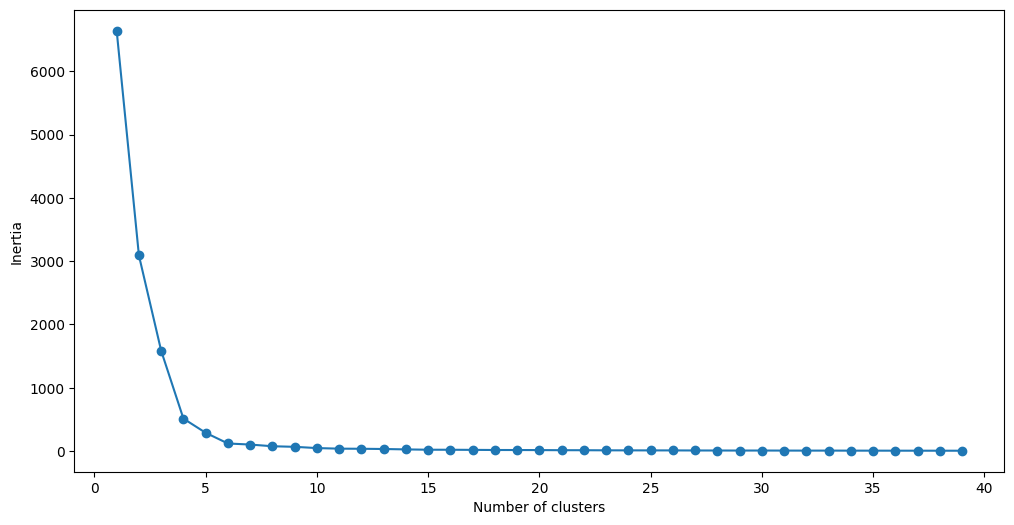

In [131]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,40):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    # The number of columns is not limited to 2. K-means clustering can be applied in
    # multi-dimensional space, provided that all columns in your dataset are numerical.
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,40), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [132]:

# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(reduced_data)
pred = kmeans.predict(reduced_data)

In [133]:
kmeans.inertia_

288.3992051626251

In [134]:
from sklearn.metrics import silhouette_score
# calculate silhouette_score and print it
silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.7736092538142109


In [135]:

frame = pd.DataFrame(reduced_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

# cluster
# 5    1141
# 3    1024
# 1     971
# 2     848
# 0     646
# 4     612
# Name: count, dtype: int64

cluster
2    1299
0    1147
1    1106
3    1014
4     686
Name: count, dtype: int64

In [136]:
pred

array([2, 0, 1, ..., 1, 0, 1], dtype=int32)

In [137]:
kmeans.labels_

array([2, 0, 1, ..., 1, 0, 1], dtype=int32)

In [138]:
reduced_data

array([[-0.07668672,  0.71088211],
       [-0.88433839, -0.5874514 ],
       [ 1.29016521,  0.46767176],
       ...,
       [ 0.90074003,  0.69451998],
       [-0.98649539, -0.49095921],
       [ 0.99522334,  0.67129469]])

Text(0.5, 1.0, 'Scatter plot of customer segmention')

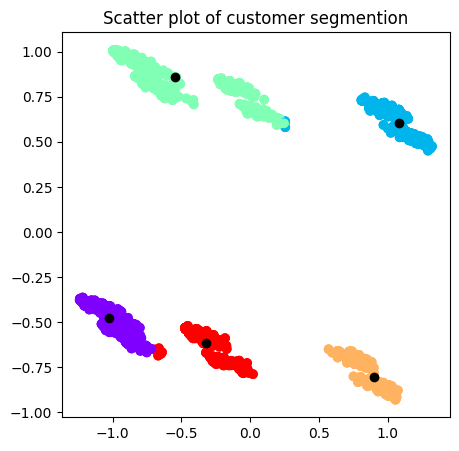

In [139]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0],y = reduced_data[:,1], c=kmeans.labels_, cmap='rainbow' )

# kmeans.cluster_centers_[:,0] gets all the x-coordinates of the cluster centers (the first column of the 2D array).
# kmeans.cluster_centers_[:,1] gets all the y-coordinates of the cluster centers (the second column of the 2D array).
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Scatter plot of customer segmention')

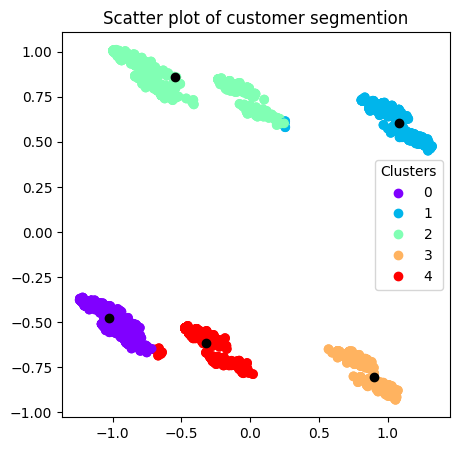

Cluster 0: 1147 data points
Cluster 1: 1106 data points
Cluster 2: 1299 data points
Cluster 3: 1014 data points
Cluster 4: 686 data points


In [143]:
plt.figure(figsize=(5,5))
scatter = plt.scatter(x=reduced_data[:,0],y = reduced_data[:,1], c=kmeans.labels_, cmap='rainbow')

# Adding the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Scatter plot of customer segmention')

# Add a color legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

# Count the number of data points in each cluster
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

# Print the counts of data points in each cluster
for label, count in cluster_counts.items():
    print(f'Cluster {label}: {count} data points')